In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [43]:
def gaussian(x, mu, sigma, a):
    return a/(np.sqrt(2*np.pi)*sigma) * np.exp(-(x - mu)**2 / (2*sigma**2))

In [44]:
rand = np.random.rand(100)
rand = (2*rand - 1)*0.05

In [45]:
arr_x = np.arange(100, 200, 1)
arr_y = gaussian(arr_x, 150, 10, 30) + rand

In [46]:
(x, a, b) = sym.symbols('x a b')

In [47]:
def f(x, mu, sigma):
    f = 30/(np.sqrt(2*np.pi)*sigma) * sym.exp(-(x - mu)**2 / (2*sigma**2))
    return f

In [48]:
def jacobi(p1, p2):
    jacobi_mat = []
    r_arr = []
    for i in range(arr_x.shape[0]):
        func = f(arr_x[i], a, b)
        r = arr_y[i] - func
        j1 = sym.diff(r, a)
        j2 = sym.diff(r, b)
        j1 = j1.subs([(a, p1), (b, p2)])
        j2 = j2.subs([(a, p1), (b, p2)])
        j = [j1,j2]
        r = r.subs([(a, p1), (b, p2)])
        jacobi_mat.append(j)
        r_arr.append(r)
    jacobi_mat = np.array(jacobi_mat).astype('float')
    r_arr = np.array(r_arr).astype('float')
    return jacobi_mat, r_arr

In [49]:
init_a = 150
init_b = 5
params = np.array([init_a, init_b])

In [50]:
inv = np.linalg.inv(np.dot(J.T, J))
params = params - np.dot(np.dot(inv, J.T), r_arr)

In [51]:
J, arr = jacobi(params[0], params[1])

In [53]:
JJ = np.dot(J.T, J)

In [56]:
D = np.diag(np.diag(JJ))

In [57]:
D

array([[1.0152556, 0.       ],
       [0.       , 1.5228834]])

In [16]:
while(True):
    J, r_arr = jacobi(params[0], params[1])
    inv = np.linalg.inv(np.dot(J.T, J))
    new_params = params - np.dot(np.dot(inv, J.T), r_arr)
    if (new_params[0] - params[0] <0.001) and (new_params[1] - params[1] <0.001):
        break
    params = new_params

In [17]:
params

array([0.3617499 , 0.55576095])

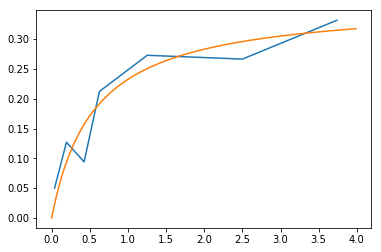

In [19]:
plt.plot(arr_S, arr_v)
x_arr = np.arange(0, 4, 0.01)
func = params[0] * x_arr / (x_arr + params[1])
plt.plot(x_arr, func)